<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Forecasts-and-predictions" data-toc-modified-id="Forecasts-and-predictions-1">Forecasts and predictions</a></span><ul class="toc-item"><li><span><a href="#1.-Importing-and-inspecting-data" data-toc-modified-id="1.-Importing-and-inspecting-data-1.1">1. Importing and inspecting data</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-1.2">2. EDA</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.2.1">Summary</a></span></li></ul></li><li><span><a href="#3.-Churn-prediction-model" data-toc-modified-id="3.-Churn-prediction-model-1.3">3. Churn prediction model</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.3.1">Summary</a></span></li></ul></li><li><span><a href="#4.-Customer-segmentation" data-toc-modified-id="4.-Customer-segmentation-1.4">4. Customer segmentation</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.4.1">Summary</a></span></li></ul></li><li><span><a href="#5.-Conclusions-and-recommendations" data-toc-modified-id="5.-Conclusions-and-recommendations-1.5">5. Conclusions and recommendations</a></span><ul class="toc-item"><li><span><a href="#Key-results" data-toc-modified-id="Key-results-1.5.1">Key results</a></span></li><li><span><a href="#Retention-strategy-recommendations" data-toc-modified-id="Retention-strategy-recommendations-1.5.2">Retention strategy recommendations</a></span></li></ul></li></ul></li></ul></div>

# Forecasts and predictions

Built a churn prediction model for sports club. Conducted customer segmentation via scikit-learn, and developed retention strategies based on deep activity and churn driver analysis.

## 1. Importing and inspecting data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
df.shape

(4000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


We have a dataframe which contains data for the month before churn and a fact of churn for the certain month. Dataset is not very large - just 4000 observations. There are 14 columns in total. No missing values. At first glance data types are also specified correctly, only `Month_to_end_contract` column type should be transformed to `int`. All categorical variables are already represented in numerical format. 

In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')

## 2. EDA

Let's dive into statistics. 

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


We can map an average clienrt portrait. 
- It is a man or a woman 29 years old on average
- Living at a distance of about 1 km from the sports club
- Every second client joins via partner program
- Every third client came by the refferal
- Average contract period is 5 months (that means that average customer does not immediately subscribes on annual basis)
- On average clients attend 2 classes a week.

Let's look at the average parameters in two groups — those who churn and those who don't.

In [7]:
df.groupby(['Churn']).agg({'mean'})

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We see that clients who churn are doing it after 1.7 months of visiting the club.

Let's draw charts with distriution of the attributes for churned and remained clients.

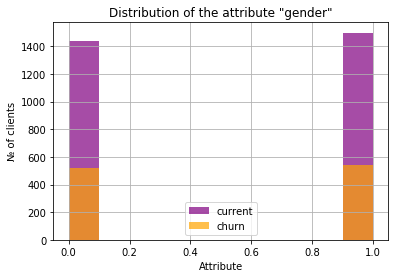

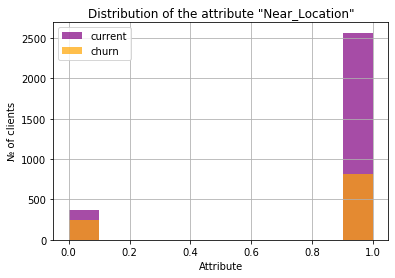

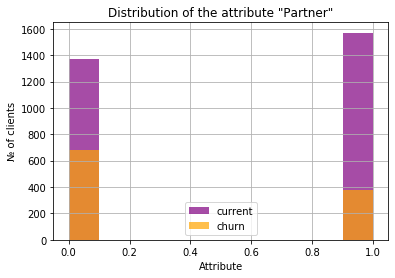

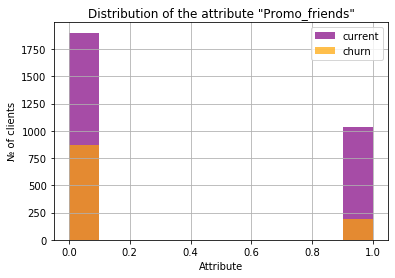

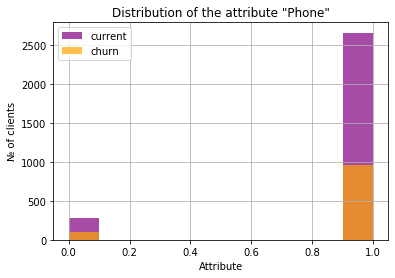

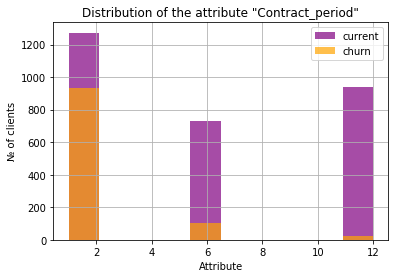

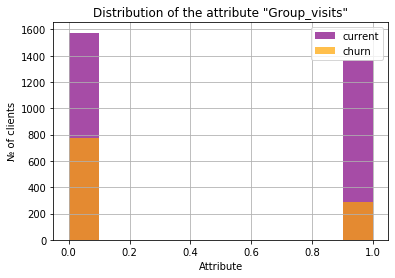

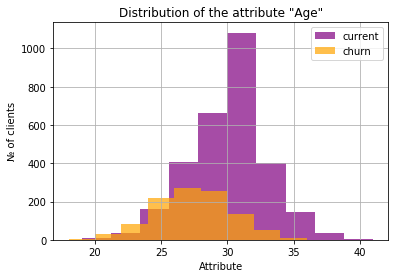

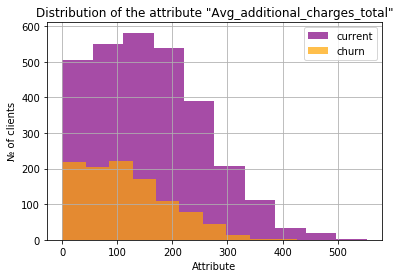

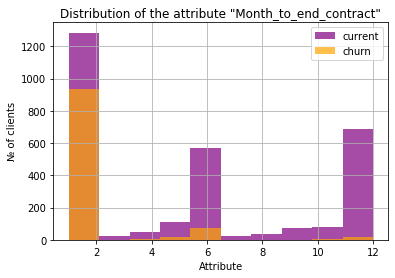

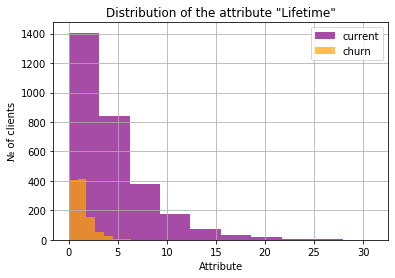

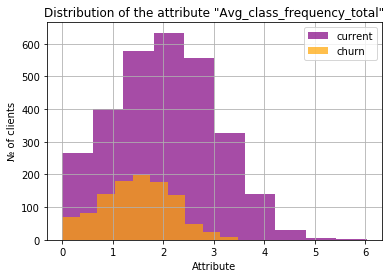

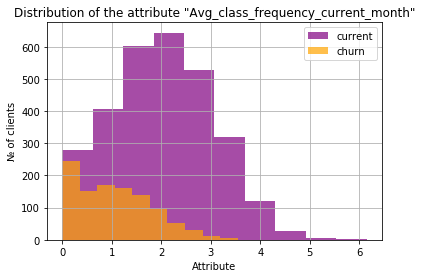

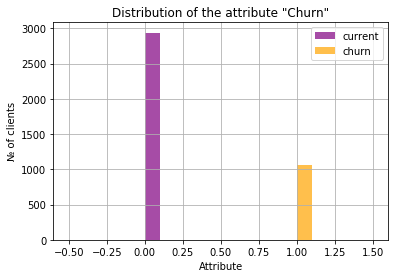

In [8]:
for col in df.columns:

    ax1 = df.query('Churn == 0').hist(col, 
                                                      grid=True, 
                                                      alpha=.7, 
                                                      color='purple', 
                                                      label='current')

    ax2 = df.query('Churn == 1').hist(col, 
                                                      grid=True, 
                                                      alpha=.7, 
                                                      color='orange', 
                                                      label='churn',
                                                      ax=ax1)

    #plt.ylim(0, 1200)
    #plt.xlim(0, 50)
    plt.legend()
    plt.title('Distribution of the attribute "{}"'.format(col))
    plt.xlabel("Attribute")
    plt.ylabel("№ of clients")
    plt.show()

The most interesting insight here is that the most of churned clients are those who have visited for about 2 months or bought short-term membership. Besides that: 
- There is no gender difference  
- Those who live closer to the club churn less  
- Those who had referrals or participated in partner programs churn less 
- Current clients more frequently go for group lessons than clientswho are going to churn. 

Now let's make a correlation matrix and display it on the graph.

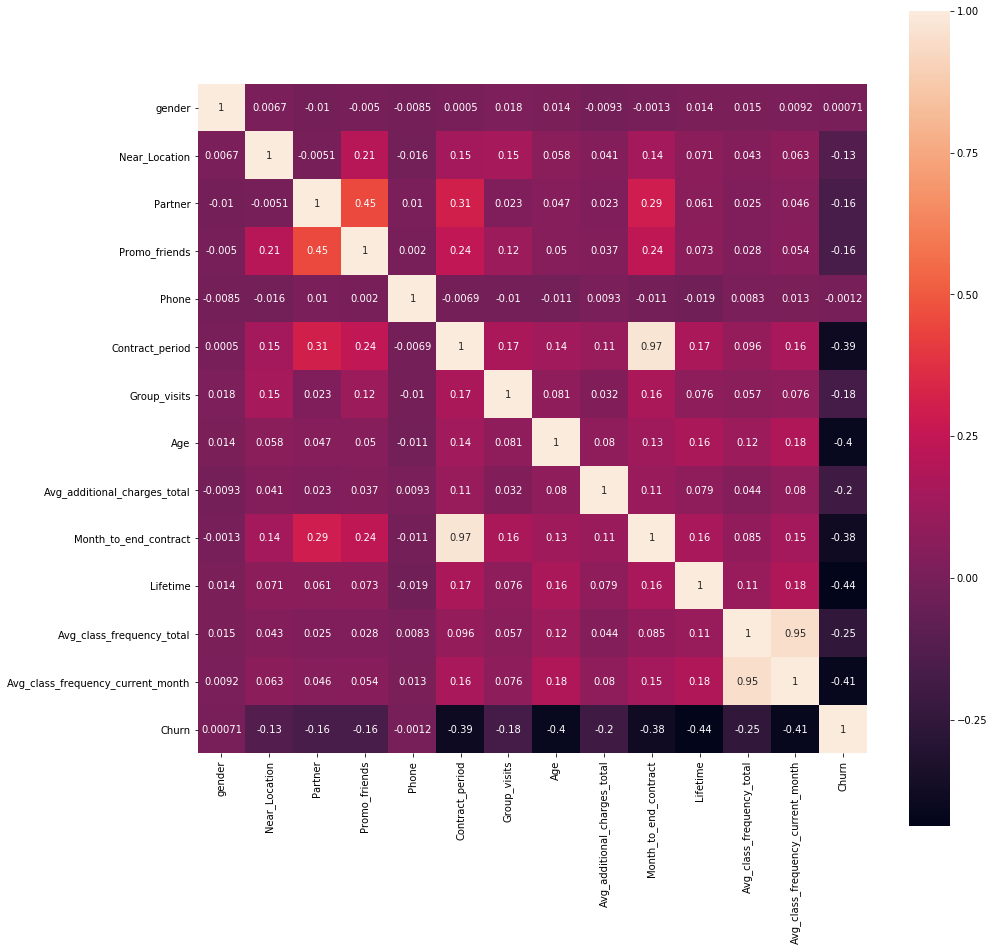

In [9]:
cm = df.corr() # calculating correlation matrix 
fig, ax = plt.subplots(figsize=(15,15))

# making heatmap
sns.heatmap(cm, annot = True, square=True)


plt.show()

We see that two pairs of variables strongly correlate with each other (the contract period and the month before the end of the contract + the average frequency of visits in the last month and for the entire period). This should be taken into account when building the model.

### Summary

We processed the data and performed EDA. So far, we can not make an unambiguous conclusion about what most strongly affect the target variable (churn - not churn). But one trend stood out - churned clients are mostly those whose contract on average lasted about 2 months.

## 3. Churn prediction model 

Let's build a model of binary classification of clients, where the target attribute is the fact of client churn during the next month. Plan:
- Splitting the data into a training and validation samples.
- Training the model on a train sample in two ways: Logistic Regression and Random Forest.
- Evaluation of Accuracy, Precision and Recall metrics for both models on a validation sample.

In [10]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [11]:
# splitting into attributes
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [12]:
# splitting into training and validation samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# algorithm for LR model 
lr_model = LogisticRegression(solver='liblinear', random_state=0)

In [14]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# forecast using LR model 
y_lr_pred = lr_model.predict(X_test)

In [16]:
# lgorithm for RF model  
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [17]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
# forecast using RF model 
y_rf_pred = rf_model.predict(X_test)

In [19]:
# metrics for LR model  
print('Metrics for LR model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_lr_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_lr_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_lr_pred)))

Metrics for LR model:
Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [20]:
# metrics for RF model 
print('Metrics for RF model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_rf_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_rf_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_rf_pred)))

Metrics for RF model:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


In [21]:
# let's see the importance of attributes in RF model 
importances = rf_model.feature_importances_

In [22]:
dict_ = {'importance': importances, 'feature': X.columns}
features_importances = pd.DataFrame(data=dict_)
features_importances.sort_values(by='importance', ascending=False)

,importance,feature
10,0.276499,Lifetime
12,0.180170,Avg_class_frequency_current_month
11,0.129883,Avg_class_frequency_total
7,0.119129,Age
8,0.091473,Avg_additional_charges_total
9,0.068855,Month_to_end_contract
5,0.065964,Contract_period
6,0.015652,Group_visits
0,0.012425,gender
2,0.012285,Partner


### Summary

Both models show very good metrics , but the Logistic Regression model is slightly better.

According to the **Random Forest model**, clients' churn is mostly affected by the following parameters: `Lifetime` (time since the first visit, 27.6%), `Avg_class_frequency_current_month` (average frequency of visits per week for the previous month, 18%), `Avg_class_frequency_total` (average frequency of visits per week for all time, 12.9%).

## 4. Customer segmentation

Let's conduct customer segmentation (cluster analysis). Plan:

- We standardize the data.
- Building a distance matrix and draw a dendrogram.
- Training a clustering model based on K-Means algorithm and predicting clients' clusters.
- Looking at the average values of each cluster features and the distribution of features. For each cluster we calculate the churn rate.

In [23]:
# standartization
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

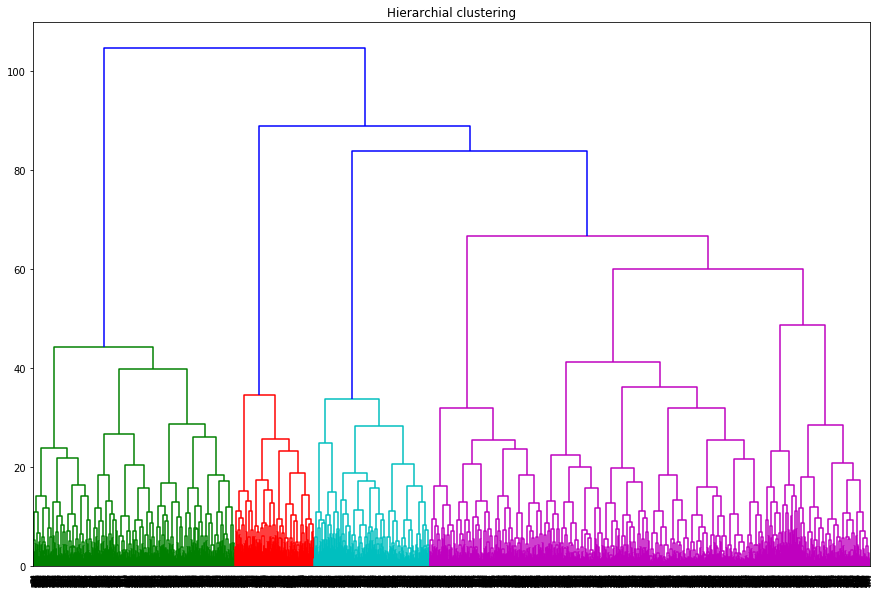

In [24]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

According to the graph, we can assume that 4-5 clusters could be distinguished (by color - 4 clusters, but then the 4th one turns out to be too large, more than 3 other clusters). Let's try to focus on 5 clusters.

In [25]:
# k_means model
km = KMeans(n_clusters = 5, random_state = 0)

In [26]:
# forecasting clusters
labels = km.fit_predict(X_sc)

In [27]:
# saving cluster labels in the dataset  
df['Cluster'] = labels

Now let's look at the average values of features across clusters and distributions.

In [28]:
df.groupby('Cluster').mean().T

Cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
Near_Location,0.959446,0.862338,0.000000,1.000000,0.976105
Partner,0.783383,0.470130,0.463366,0.350238,0.356033
Promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
Phone,1.000000,0.000000,1.000000,1.000000,0.998805
Contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
Group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
Age,29.980218,29.301299,28.477228,28.167987,30.127838
Avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
Month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


**Cluster 0**
- The lowest churn rate (2,7%)
- Most clients are from partner programs or rererred by somebody 
- The longest average membership (10 months) 
- The highest average number of group lessons  
- More costs on extra services  
- In general the most loyal clients.  

**Cluster 1**
- Churn rate is 26,7%
- Average membership is for 4,78 month long
- Cluster clients rarely provide their phone number К 
- Live approximately at 0,86 km distance from the club
- Поlmost half of the clustered are from partner programs, a third are referred by somebody 
- Inclined to spend money on extra services.

**Cluster 2**
- Significant churn rate - 44,3%
- There are a lot of clients who were referred by friends
- No information on distance to the club
- Average membership is 2,35 month long
- Less inclined to spend money on extra services
- The lowest rate of attendance 
- Not very loyal clients.

**Cluster 3**
- The biggest churn rate - 51,4%
- The lowest attendance rate (1 visit a week during the following month) 
- Average membership is 1,94 month long (the lowest rate)
- The least loyal clients.

**Cluster 4**
- Churn rate - only 6,8%
- Average membership is 2,66 month long
- The highest attendance rate(2,85 visits a week)
- In general loyal clients. 


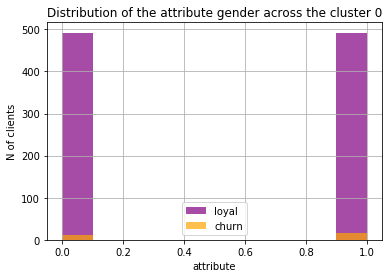

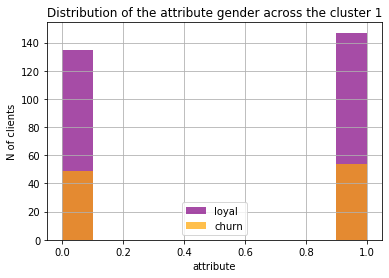

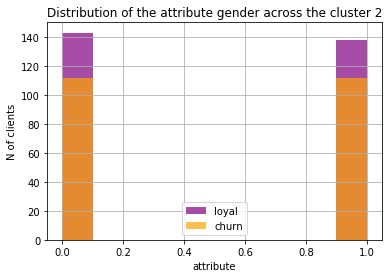

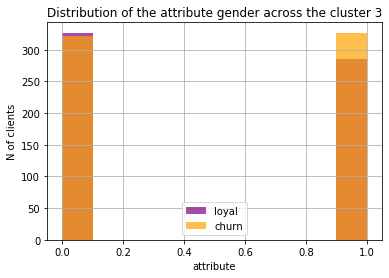

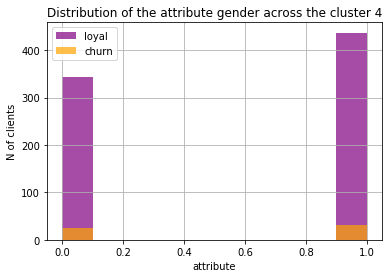

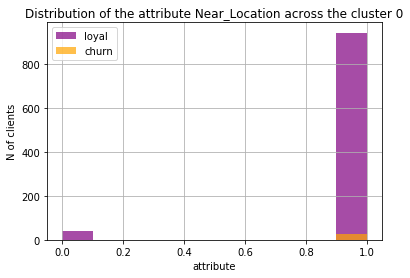

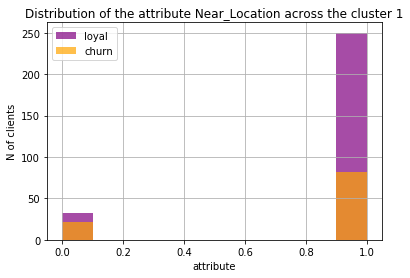

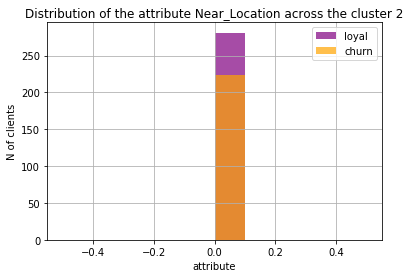

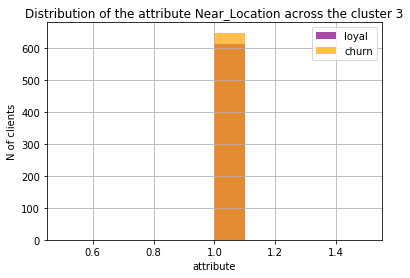

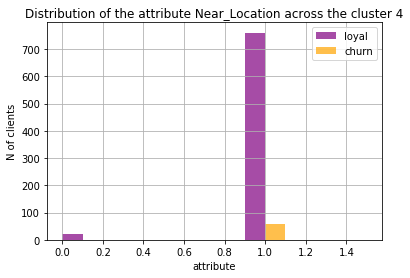

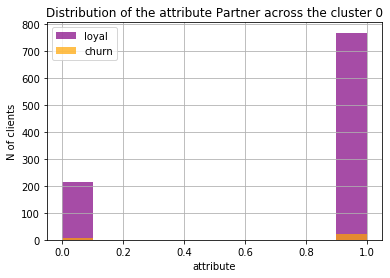

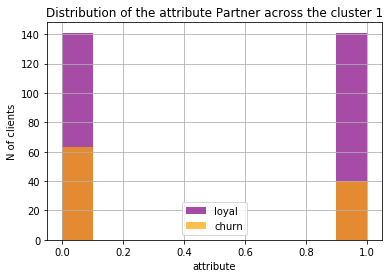

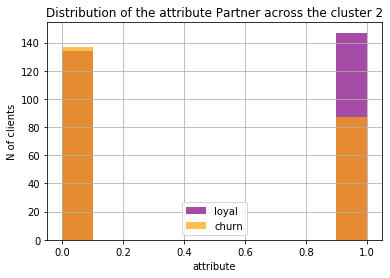

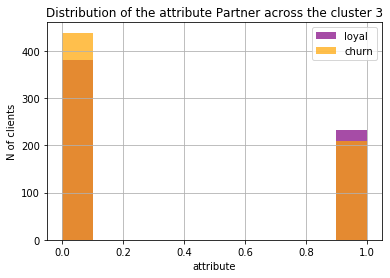

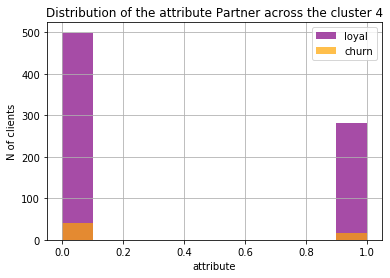

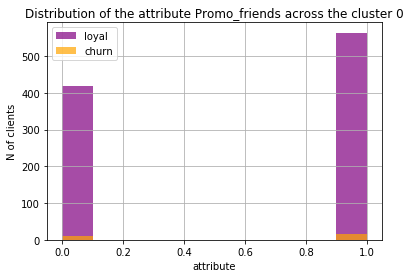

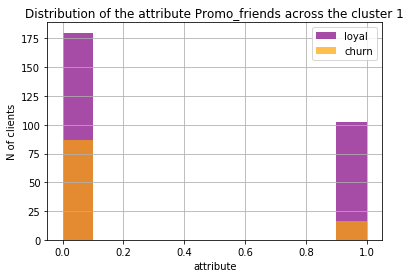

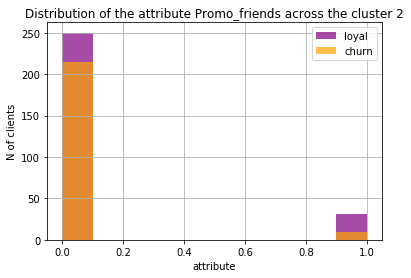

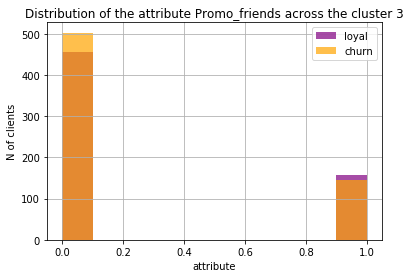

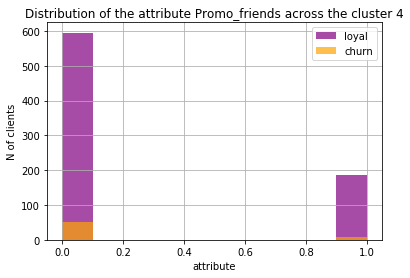

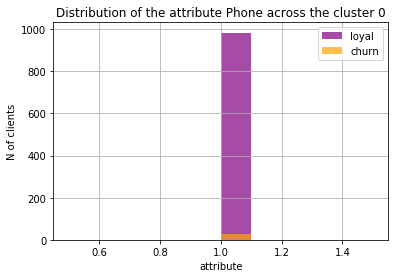

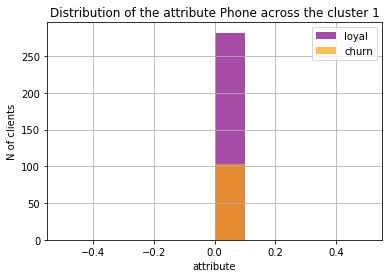

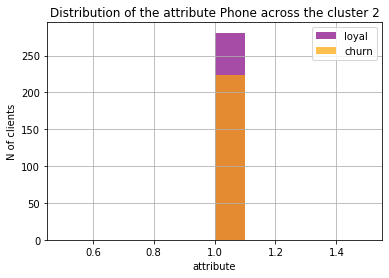

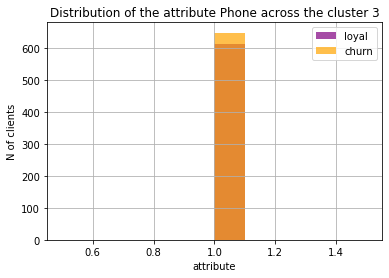

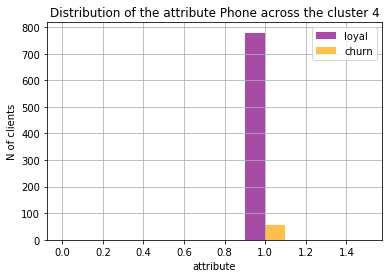

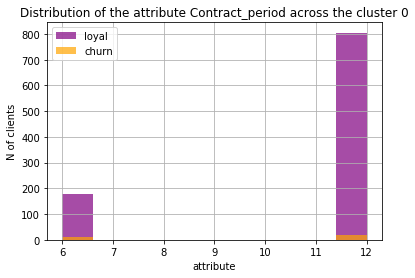

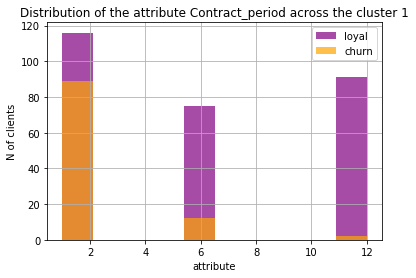

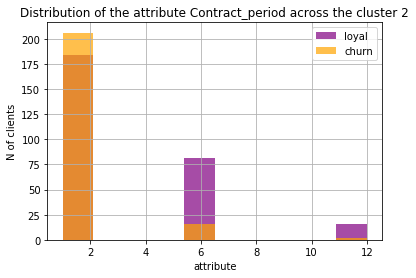

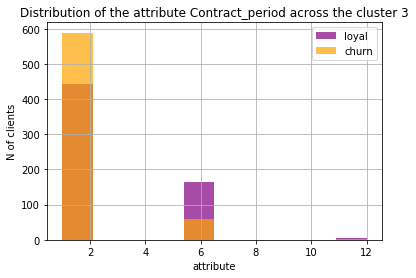

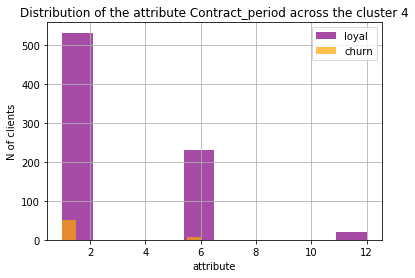

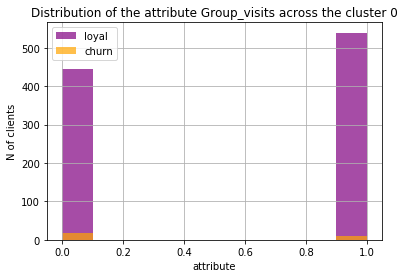

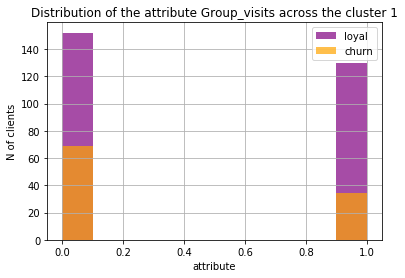

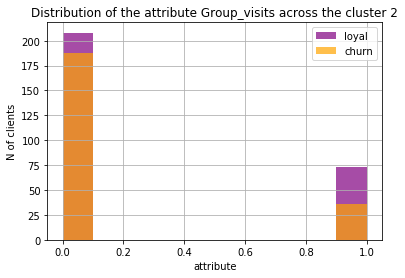

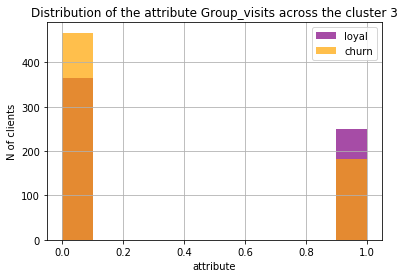

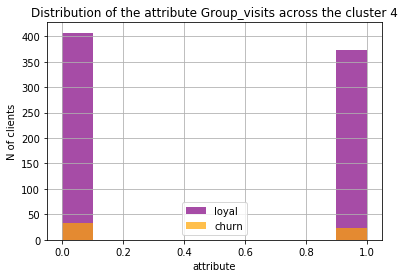

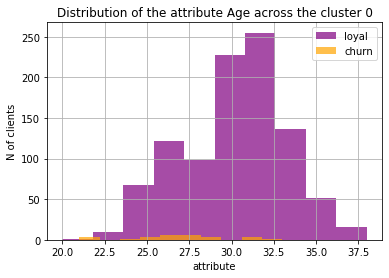

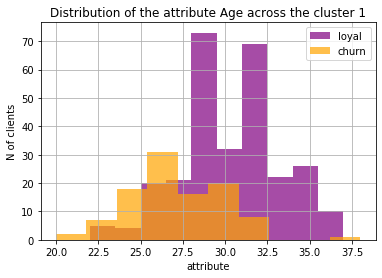

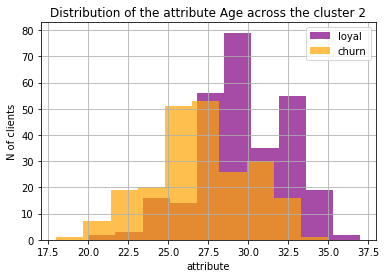

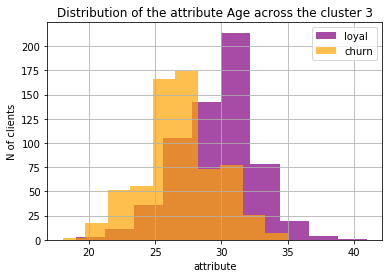

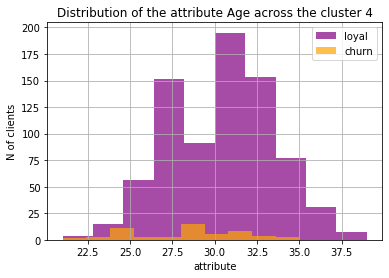

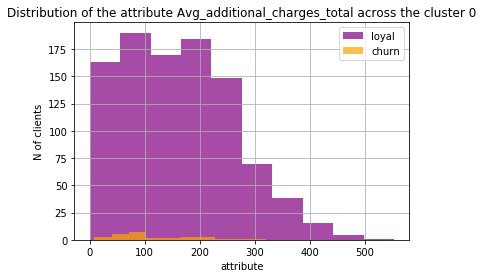

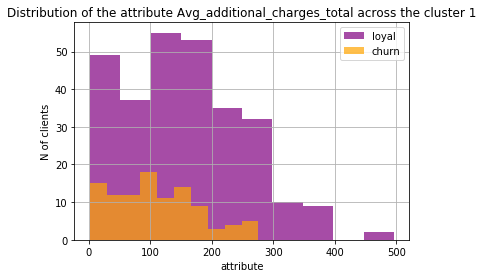

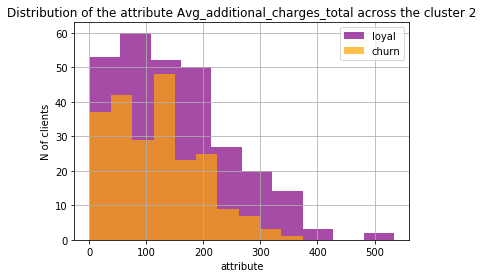

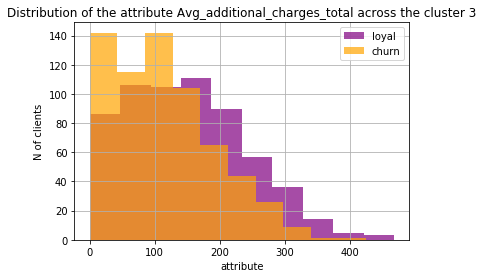

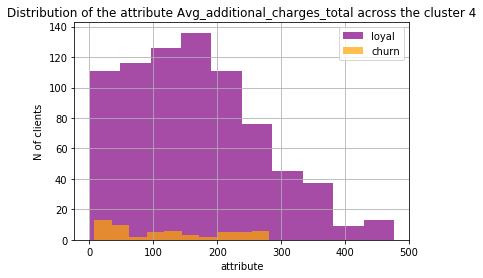

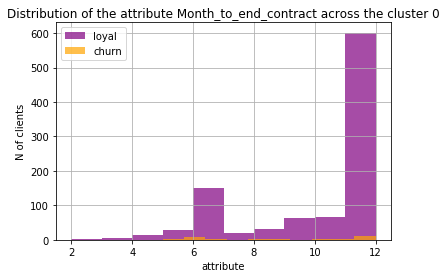

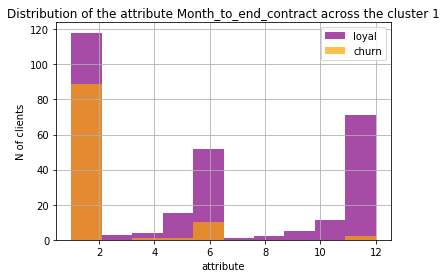

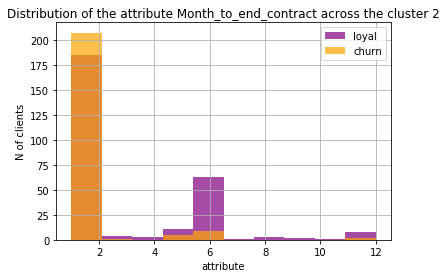

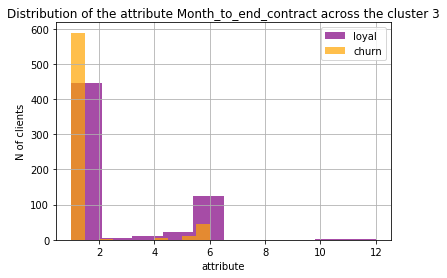

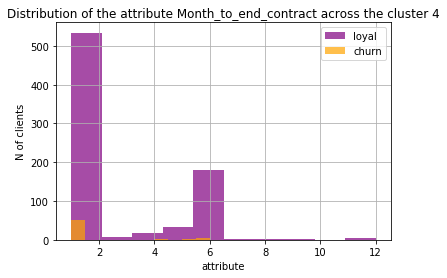

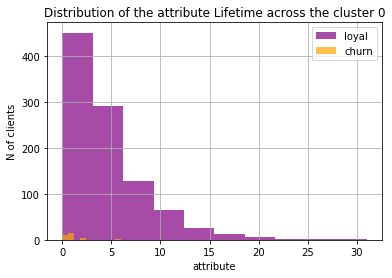

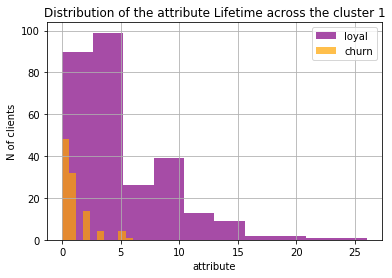

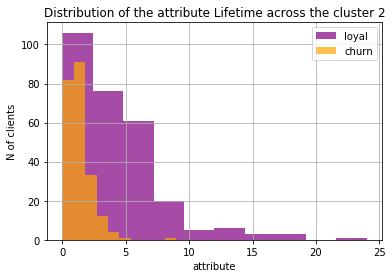

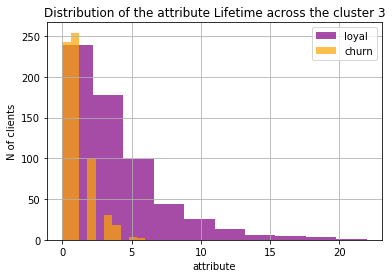

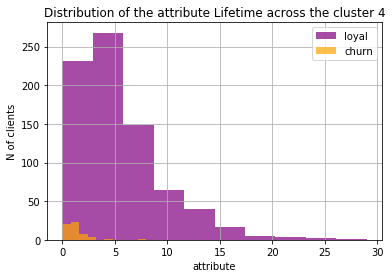

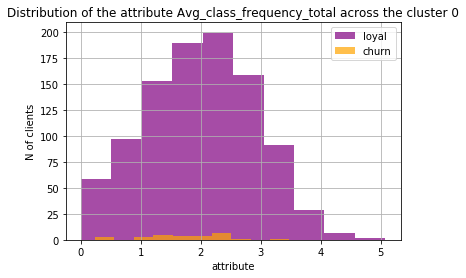

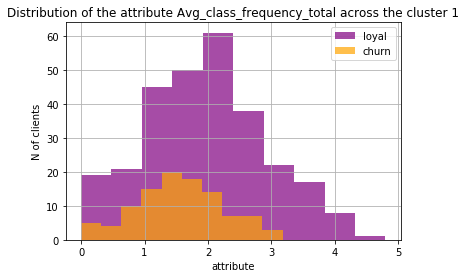

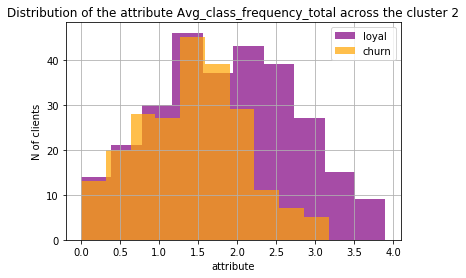

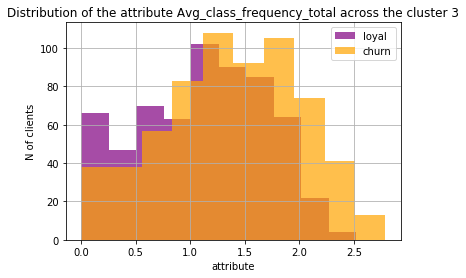

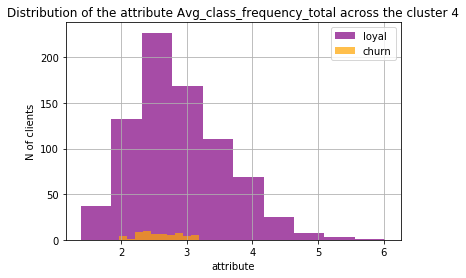

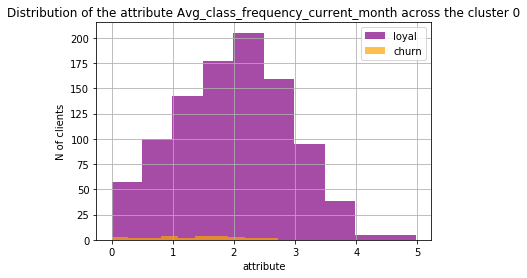

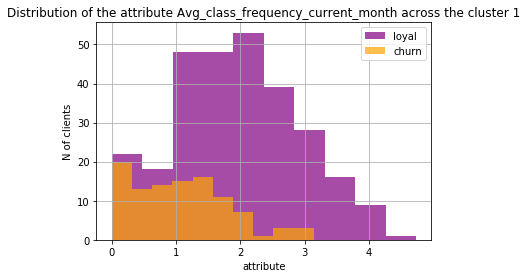

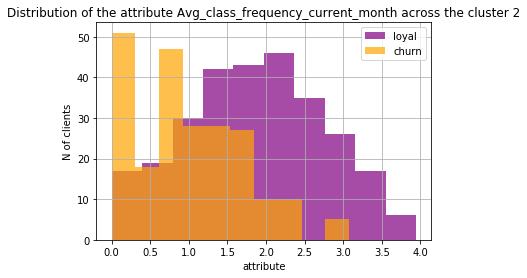

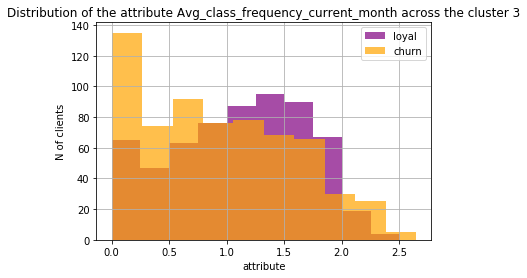

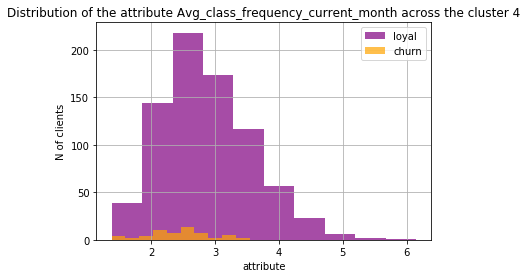

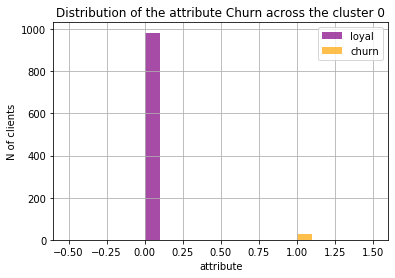

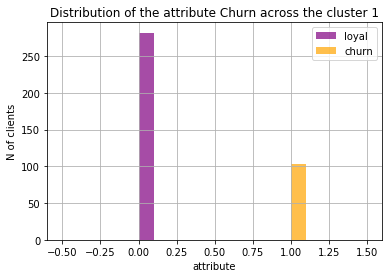

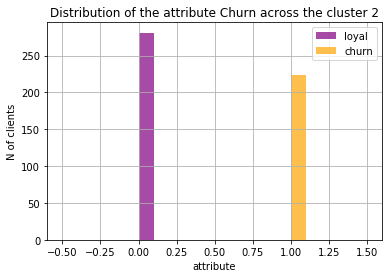

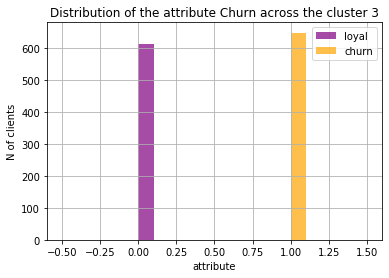

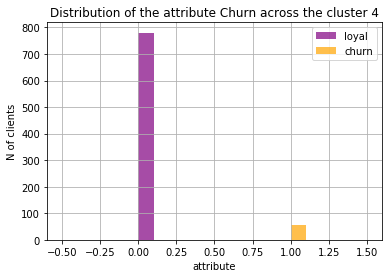

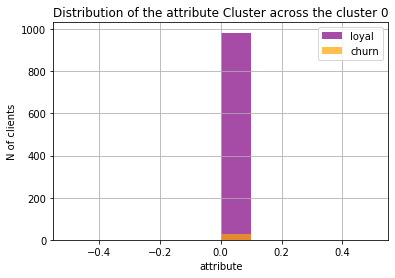

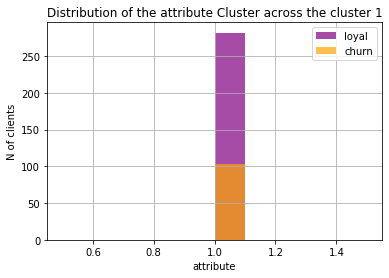

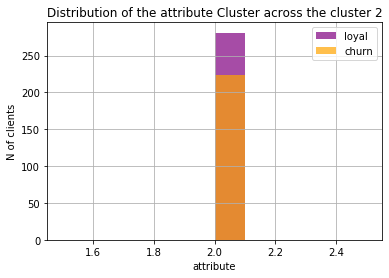

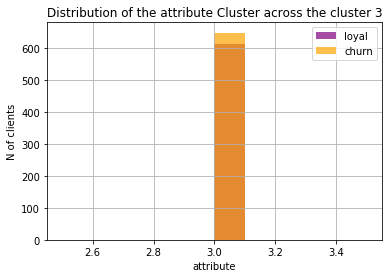

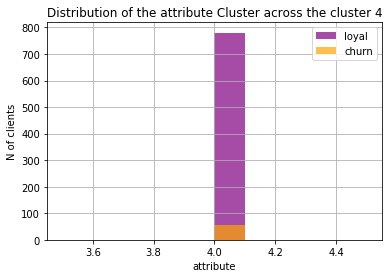

In [32]:
clusters = [0, 1, 2, 3, 4]

for col in df.columns:
    
    for i in clusters:

        ax1 = df.query('Churn == 0 and Cluster == {}'.format(i)).hist(col, 
                                                          grid=True, 
                                                          alpha=.7, 
                                                          color='purple', 
                                                          label='loyal')

        ax2 = df.query('Churn == 1 and Cluster == {}'.format(i)).hist(col, 
                                                          grid=True, 
                                                          alpha=.7, 
                                                          color='orange', 
                                                          label='churn',
                                                          ax=ax1)


        plt.legend()
        plt.title('Distribution of the attribute {0} across the cluster {1}'.format(col, i))
        plt.xlabel("attribute")
        plt.ylabel("N of clients")
        plt.show()

The graphs clearly show that **the highest churn rates are in clusters 2 and 3**.

Let's look again at churn rate for each cluster.

In [30]:
churn_by_clusters = df.groupby('Cluster').agg({'Churn':'mean'})

In [31]:
churn_by_clusters

,Churn
Cluster,
0,0.027695
1,0.267532
2,0.443564
3,0.514263
4,0.068100


### Summary

It is clearly seen that clusters differ greatly in terms of churn rate. Clusters 2 and 3 stand out the most, they have too high churn rates (44.3% and 51.4%, respectively). The best results are shown by 0 and 4 clusters, they are the most reliable (only 2.7% and 6.8%, respectively).

## 5. Conclusions and recommendations

### Key results

Based on the results of a preliminary study and EDA, we noticed that most of the churned clients are those whose average membership contract is 2 month long.

Next, we built a binary classification model in order to predict the fact of clients' churn during the next month. The model was trained in two ways: by logistic regression and random forest. Both models showed very good metrics, but the logistic regression model was slightly better.

The models also showed that churn rate is most strongly influenced by the following parameters: `Lifetime` (time since the first visit, 27.6%), `Avg_class_frequency_current_month` (average frequency of visits per week for the previous month, 18%), `Avg_class_frequency_total` (average frequency of visits per week for all time, 12.9%). This generally confirmed the results of the EDA - most of all it is necessary to monitor the time that has passed since the first visit to the sports club.

After perfoming cluster analysis (based on K-Means algorithm) we predicted 5 clusters of clients. The **highest churn rate** turned out to be **in clusters 2 and 3 (44.3% and 51.4%** of churn rate) - marketers are recommended to work with these clusters in the first place. The best results are shown by 0 and 4 clusters, they are the most reliable (only 2.7% and 6.8% of outflow).

### Retention strategy recommendations

Based on the results of the analysis, we recommend focusing on the following marketing activities:
- Actively engaging with the clients from cluster 2 and 3 (for example, sending extra email or giving a call from the club manager or conducting a customer satisfaction survey).
- Focusing on engaging with clients who have a short-term contract for 1-3 months (for example, offering discounts on contract renewal, inviting to a corporate event where they can have a good time and get to know coaches and other clients better in an informal setting).
- Motivating customers who have been visiting for about 2 months (in general people lose motivation to go to a sports club after a couple of months). For example, providing a free trial workout with a trainer, bringing a friend to a workout, a day at the club with all free classes(including pool, group classes, etc.), participation in a fitness challenge (competition with other clients of the club for the best result).